<a href="https://colab.research.google.com/github/Carvas91/PyTroch/blob/main/regression_crossval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

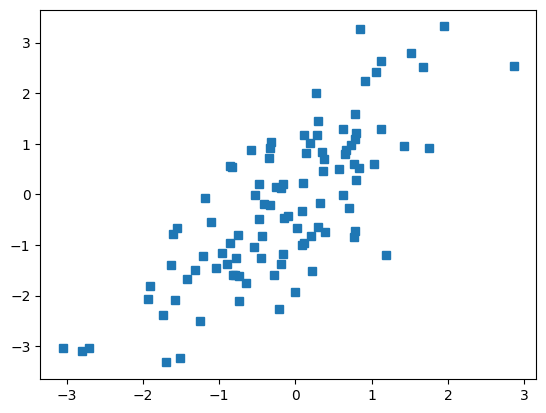

In [76]:
N = 100
x = torch.randn(N,1)
y = x + torch.randn(N,1)

plt.plot(x,y,'s')
plt.show()

In [77]:
ANNReg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

In [78]:
learning_rate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNReg.parameters(), lr=learning_rate)

In [79]:
trainidx = np.random.choice(range(N),80, replace=False)
trainbool = np.zeros(N,dtype=bool)
trainbool[trainidx] = True

print(x[trainbool].shape)
print(x[~trainbool].shape)

torch.Size([80, 1])
torch.Size([20, 1])


In [80]:
epochs = 500
for i in range(epochs):
  yHat = ANNReg(x[trainbool])
  loss = lossfun(yHat, y[trainbool])

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

In [81]:
test_preds = ANNReg(x[~trainbool])
test_loss = lossfun(test_preds,y[~trainbool])
test_loss2 = (test_preds-y[~trainbool]).pow(2).mean()

print(f"Test loss: {test_loss.detach()}")
print(f'Train loss: {loss.detach()}')

Test loss: 0.8332881927490234
Train loss: 0.9032871127128601


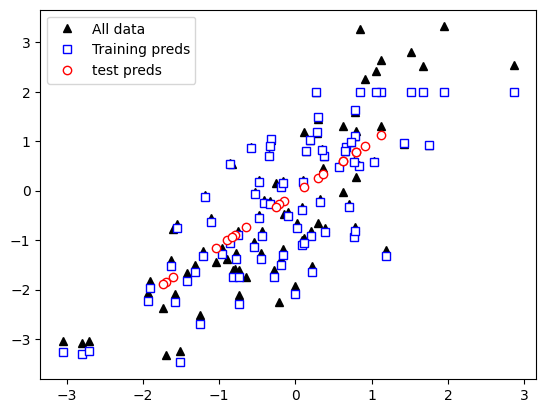

In [82]:
predYtrain = ANNReg(y[trainbool]).detach().numpy()

plt.plot(x,y,'k^',label='All data')
plt.plot(x[trainbool],predYtrain,
         'bs',markerfacecolor='w',label='Training preds')

plt.plot(x[~trainbool],test_preds.detach(),
         'ro',markerfacecolor='w',label="test preds")

plt.legend()
plt.show()